In [27]:
library(dplyr)
library(ggplot2)
library(gridExtra)

acs_2018 = read.table("usa_00007.csv", sep = ",", header = TRUE)
acs_2018_1 = read.table("cleaned_acs_2018.csv", sep = ",", header = TRUE)

# Filter state to Minnesota
minn = filter(acs_2018, STATEFIP == '27')
minn1 = filter(acs_2018_1, STATEFIP == 'Minnesota')
#head(minn)
minn = data.frame(minn)
head(minn)

summary(minn)

YEAR,STATEFIP,FAMSIZE,SEX,AGE,MARRNO,RACE,RACED,YRSUSA1,EDUC,EDUCD,CLASSWKR,CLASSWKRD,UHRSWORK,INCWAGE,POVERTY,OCCSCORE,DIFFSENS
2018,27,3,1,37,1,1,100,0,10,101,2,22,40,39815,501,42,1
2018,27,3,2,37,1,1,100,0,10,101,2,22,50,106173,501,42,1
2018,27,2,2,25,0,1,100,0,7,71,2,22,36,16988,105,16,1
2018,27,5,2,43,1,1,100,0,8,81,2,22,32,45654,363,25,1
2018,27,5,1,42,1,1,100,0,8,81,2,22,50,63704,363,30,1
2018,27,5,2,18,0,1,100,0,6,61,0,0,0,0,363,0,1


      YEAR         STATEFIP     FAMSIZE            SEX             AGE       
 Min.   :2018   Min.   :27   Min.   : 1.000   Min.   :1.000   Min.   :18.00  
 1st Qu.:2018   1st Qu.:27   1st Qu.: 2.000   1st Qu.:1.000   1st Qu.:35.00  
 Median :2018   Median :27   Median : 2.000   Median :2.000   Median :52.00  
 Mean   :2018   Mean   :27   Mean   : 2.566   Mean   :1.502   Mean   :50.77  
 3rd Qu.:2018   3rd Qu.:27   3rd Qu.: 3.000   3rd Qu.:2.000   3rd Qu.:64.00  
 Max.   :2018   Max.   :27   Max.   :17.000   Max.   :2.000   Max.   :95.00  
     MARRNO            RACE           RACED          YRSUSA1      
 Min.   :0.0000   Min.   :1.000   Min.   :100.0   Min.   : 0.000  
 1st Qu.:1.0000   1st Qu.:1.000   1st Qu.:100.0   1st Qu.: 0.000  
 Median :1.0000   Median :1.000   Median :100.0   Median : 0.000  
 Mean   :0.9413   Mean   :1.306   Mean   :131.8   Mean   : 1.261  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:100.0   3rd Qu.: 0.000  
 Max.   :3.0000   Max.   :9.000   Max.   :990.0   Ma

In [9]:
# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
head(minn1)
summary(minn1)
minn$MARST = minn1$MARST
minn$EDUC = minn1$EDUC
minn$CLASSWKR = minn1$CLASSWKR
minn$DIFFSENS = minn1$DIFFSENS
minn$SEX = minn1$SEX
minn$RACE = minn1$RACE

X,YEAR,STATEFIP,FAMSIZE,SEX,AGE,MARRNO,RACE,RACED,YRSUSA1,EDUC,EDUCD,CLASSWKR,CLASSWKRD,UHRSWORK,INCWAGE,POVERTY,OCCSCORE,DIFFSENS
214125,2018,Minnesota,3,Male,37,Married once,White,White,N/A or less than one year,4 years of college,Bachelor's degree,Works for wages,"Wage/salary, private",40,39815,501 percent or more of poverty threshold,NA,No vision or hearing difficulty
214126,2018,Minnesota,3,Female,37,Married once,White,White,N/A or less than one year,4 years of college,Bachelor's degree,Works for wages,"Wage/salary, private",50,106173,501 percent or more of poverty threshold,NA,No vision or hearing difficulty
214127,2018,Minnesota,2 family members present,Female,25,Not Applicable,White,White,N/A or less than one year,1 year of college,"1 or more years of college credit, no degree",Works for wages,"Wage/salary, private",36,16988,105,NA,No vision or hearing difficulty
214128,2018,Minnesota,5,Female,43,Married once,White,White,N/A or less than one year,2 years of college,"Associate's degree, type not specified",Works for wages,"Wage/salary, private",32,45654,363,NA,No vision or hearing difficulty
214129,2018,Minnesota,5,Male,42,Married once,White,White,N/A or less than one year,2 years of college,"Associate's degree, type not specified",Works for wages,"Wage/salary, private",50,63704,363,NA,No vision or hearing difficulty
214130,2018,Minnesota,5,Female,18,Not Applicable,White,White,N/A or less than one year,Grade 12,"12th grade, no diploma",N/A,N/A,N/A,0,363,NA,No vision or hearing difficulty


       X               YEAR           STATEFIP     
 Min.   :214125   Min.   :2018   Colorado :     0  
 1st Qu.:267880   1st Qu.:2018   Minnesota:215022  
 Median :321636   Median :2018                     
 Mean   :321636   Mean   :2018                     
 3rd Qu.:375391   3rd Qu.:2018                     
 Max.   :429146   Max.   :2018                     
                                                   
                     FAMSIZE          SEX              AGE        
 2 family members present:85262   Female:107867   57     :  4567  
 1 family member present :48183   Male  :107155   59     :  4559  
 3                       :31355                   55     :  4523  
 4                       :27982                   56     :  4517  
 5                       :13578                   58     :  4511  
 6                       : 5180                   60     :  4480  
 (Other)                 : 3482                   (Other):187865  
                      MARRNO                    

In [17]:
mn = select(minn, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
summary(mn)

    FAMSIZE            SEX             AGE            MARRNO      
 Min.   : 1.000   Min.   :1.000   Min.   :18.00   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:1.000   1st Qu.:35.00   1st Qu.:1.0000  
 Median : 2.000   Median :2.000   Median :52.00   Median :1.0000  
 Mean   : 2.566   Mean   :1.502   Mean   :50.77   Mean   :0.9413  
 3rd Qu.: 3.000   3rd Qu.:2.000   3rd Qu.:64.00   3rd Qu.:1.0000  
 Max.   :17.000   Max.   :2.000   Max.   :95.00   Max.   :3.0000  
      RACE          YRSUSA1            EDUC           CLASSWKR    
 Min.   :1.000   Min.   : 0.000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.: 0.000   1st Qu.: 6.000   1st Qu.:1.000  
 Median :1.000   Median : 0.000   Median : 7.000   Median :2.000  
 Mean   :1.306   Mean   : 1.261   Mean   : 7.441   Mean   :1.471  
 3rd Qu.:1.000   3rd Qu.: 0.000   3rd Qu.:10.000   3rd Qu.:2.000  
 Max.   :9.000   Max.   :89.000   Max.   :11.000   Max.   :2.000  
    UHRSWORK        INCWAGE          OCCSCORE        DIFFSENS 

In [30]:
colSums(apply(mn, 2, is.na))

FAMSIZE      SEX      AGE   MARRNO     RACE  YRSUSA1     EDUC CLASSWKR 
       0        0        0        0        0        0        0        0 
UHRSWORK  INCWAGE OCCSCORE DIFFSENS 
       0        0        0        0

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

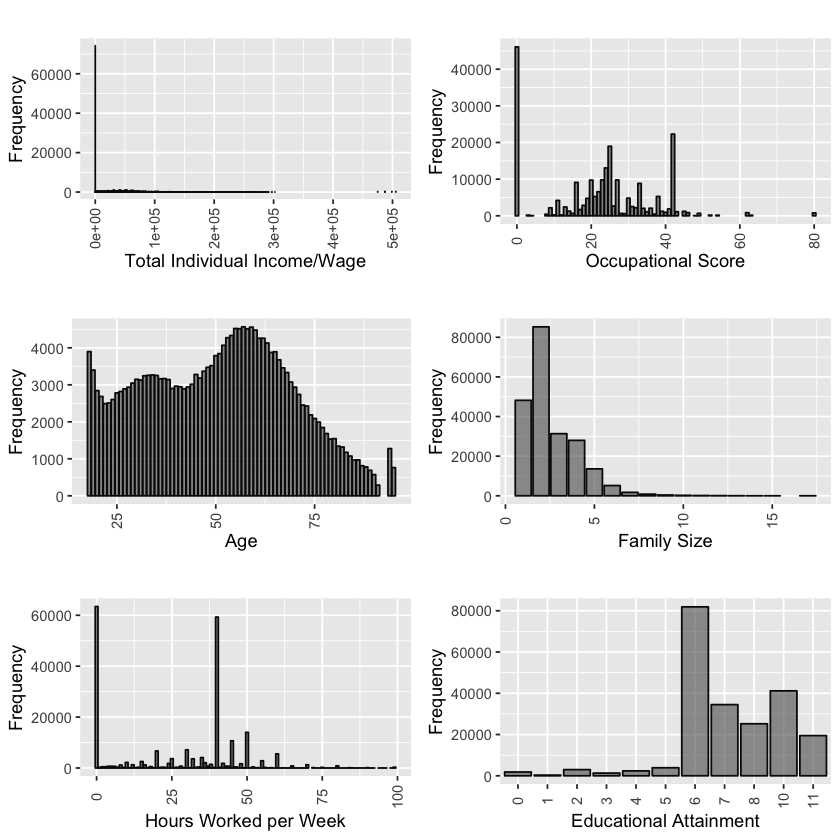

In [29]:
# Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(mn, aes(x = mn$AGE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

famsize_hist <- ggplot(mn, aes(x = mn$FAMSIZE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

hours_hist <- ggplot(mn, aes(x = mn$UHRSWORK)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

edu_hist <- ggplot(mn, aes(x = mn$EDUC)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

inc_hist <- ggplot(mn, aes(x = mn$INCWAGE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

occ_hist <- ggplot(mn, aes(x = mn$OCCSCORE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, hours_hist, edu_hist, nrow=3)

In [45]:
library(tidyverse)
library(corrplot)

mn$EDUC = as_factor(mn$EDUC)
mn$CLASSWKR = as_factor(mn$CLASSWKR)
mn$DIFFSENS = as_factor(mn$DIFFSENS)
mn$SEX = as_factor(mn$SEX)
mn$RACE = as_factor(mn$RACE)

lm_mn = lm(INCWAGE ~. , data = mn)#, family = gaussian)
summary(lm_mn)
cor(model.matrix(lm_mn)[,-1])


Call:
lm(formula = INCWAGE ~ ., data = mn)

Residuals:
    Min      1Q  Median      3Q     Max 
-171062  -16000   -1445    7736  508994 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -17508.368   1094.116  -16.002  < 2e-16 ***
FAMSIZE       1629.852     65.576   24.855  < 2e-16 ***
SEX2         -5406.317    182.378  -29.643  < 2e-16 ***
AGE            172.816      6.876   25.132  < 2e-16 ***
MARRNO        2817.058    152.365   18.489  < 2e-16 ***
RACE2        -1849.182    563.713   -3.280 0.001037 ** 
RACE3        -1887.630    817.244   -2.310 0.020903 *  
RACE4         1725.533   1524.850    1.132 0.257800    
RACE5        -2341.059   3609.970   -0.648 0.516663    
RACE6        -2147.591    659.577   -3.256 0.001130 ** 
RACE7        -5031.993   1046.997   -4.806 1.54e-06 ***
RACE8         -517.989    801.927   -0.646 0.518326    
RACE9        -1783.215   2650.640   -0.673 0.501108    
YRSUSA1         53.958     14.802    3.645 0.000267 ***
EDUC1  

,FAMSIZE,SEX2,AGE,MARRNO,RACE2,RACE3,RACE4,RACE5,RACE6,RACE7,...,EDUC6,EDUC7,EDUC8,EDUC10,EDUC11,CLASSWKR1,CLASSWKR2,UHRSWORK,OCCSCORE,DIFFSENS2
FAMSIZE,1.000000e+00,-1.858238e-05,-0.330311220,0.033016246,0.0194502382,0.027473744,-0.0021742184,-0.0054620280,0.123921345,0.057900237,...,-0.0789547436,-0.022018566,0.063292345,0.037620235,0.023085744,0.027267259,0.1512693415,0.201171306,0.1541712293,-0.1136229371
SEX2,-1.858238e-05,1.000000e+00,0.036728239,0.059084758,-0.0146572489,-0.002866146,0.0075038535,0.0104476027,0.006368594,-0.007681787,...,-0.0385890753,0.001302301,0.023436993,0.036272491,0.015039748,-0.123137889,0.0034841961,-0.174927503,-0.1442034105,-0.0580130706
AGE,-3.303112e-01,3.672824e-02,1.000000000,0.448833756,-0.0807992343,-0.034010423,-0.0325213537,-0.0012766757,-0.094609938,-0.057875712,...,0.1155107169,-0.078109272,-0.072471510,-0.064970204,0.027959320,0.040516336,-0.4707850719,-0.421094935,-0.3489760975,0.2689296750
MARRNO,3.301625e-02,5.908476e-02,0.448833756,1.000000000,-0.0654621339,-0.038803384,-0.0215097103,-0.0030030186,-0.056378619,-0.030578420,...,0.0079904822,-0.040085650,0.029976334,-0.008273831,0.045011845,0.062142192,-0.1388223339,-0.061212850,-0.0245182219,0.0759464939
RACE2,1.945024e-02,-1.465725e-02,-0.080799234,-0.065462134,1.0000000000,-0.017676935,-0.0094444174,-0.0039445966,-0.023841287,-0.013978340,...,0.0059618369,0.020922977,-0.022119673,-0.036194772,-0.017521036,-0.031119331,0.0232447435,-0.020123221,-0.0314196162,-0.0001238364
RACE3,2.747374e-02,-2.866146e-03,-0.034010423,-0.038803384,-0.0176769352,1.000000000,-0.0063409503,-0.0026483890,-0.016006961,-0.009385011,...,0.0151742850,0.009107943,-0.003999918,-0.037423693,-0.022359172,-0.023052111,0.0010925302,-0.023696715,-0.0318765232,0.0033237974
RACE4,-2.174218e-03,7.503853e-03,-0.032521354,-0.021509710,-0.0094444174,-0.006340950,1.0000000000,-0.0014149790,-0.008552185,-0.005014216,...,-0.0222020056,-0.003380621,-0.011748117,0.003667182,0.044732147,-0.006564781,0.0034890890,-0.004647891,0.0114496846,-0.0105421873
RACE5,-5.462028e-03,1.044760e-02,-0.001276676,-0.003003019,-0.0039445966,-0.002648389,-0.0014149790,1.0000000000,-0.003571943,-0.002094259,...,-0.0080273995,0.001368997,0.001847034,0.005684408,0.005659040,-0.001718606,-0.0058054680,-0.010006736,-0.0034620065,-0.0045136528
RACE6,1.239213e-01,6.368594e-03,-0.094609938,-0.056378619,-0.0238412874,-0.016006961,-0.0085521850,-0.0035719429,1.000000000,-0.012657779,...,-0.0266648011,-0.011366922,-0.014767364,0.003532818,0.023888041,-0.029771350,0.0340118159,0.007786847,0.0152036329,-0.0150200200
RACE7,5.790024e-02,-7.681787e-03,-0.057875712,-0.030578420,-0.0139783404,-0.009385011,-0.0050142155,-0.0020942592,-0.012657779,1.000000000,...,0.0036720523,-0.011429461,-0.015851360,-0.023122515,-0.015833186,-0.011842826,0.0222464195,0.011896981,-0.0106231204,-0.0131268453


In [40]:
library(car)
library(leaps)
library(MASS)
n = dim(mn)[1]; 
reg1 = regsubsets(INCWAGE ~ FAMSIZE + SEX + AGE + MARRNO + EDUC + CLASSWKR + 
                  UHRSWORK + DIFFSENS, data = mn)

rs = summary(reg1)
rs$which

#AIC = 2*(2:33) + n*log(rs$rss/n)
#plot(AIC ~ I(1:32), xlab = "number of predictors", ylab = "AIC")

vif(lm_mn)
kappa(lm_mn)

(Intercept),FAMSIZE,SEX2,AGE,MARRNO,EDUC1,EDUC2,EDUC3,EDUC4,EDUC5,EDUC6,EDUC7,EDUC8,EDUC10,EDUC11,CLASSWKR1,CLASSWKR2,UHRSWORK,DIFFSENS2
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE


,GVIF,Df,GVIF^(1/(2*Df))
FAMSIZE,1.208340,1,1.099245
SEX,1.085806,1,1.042020
AGE,2.123224,1,1.457129
MARRNO,1.370653,1,1.170749
RACE,1.302236,8,1.016642
YRSUSA1,1.195992,1,1.093614
EDUC,1.334363,10,1.014527
CLASSWKR,3.664958,2,1.383621
UHRSWORK,2.059058,1,1.434942
OCCSCORE,3.020140,1,1.737855


[1] 3759.226

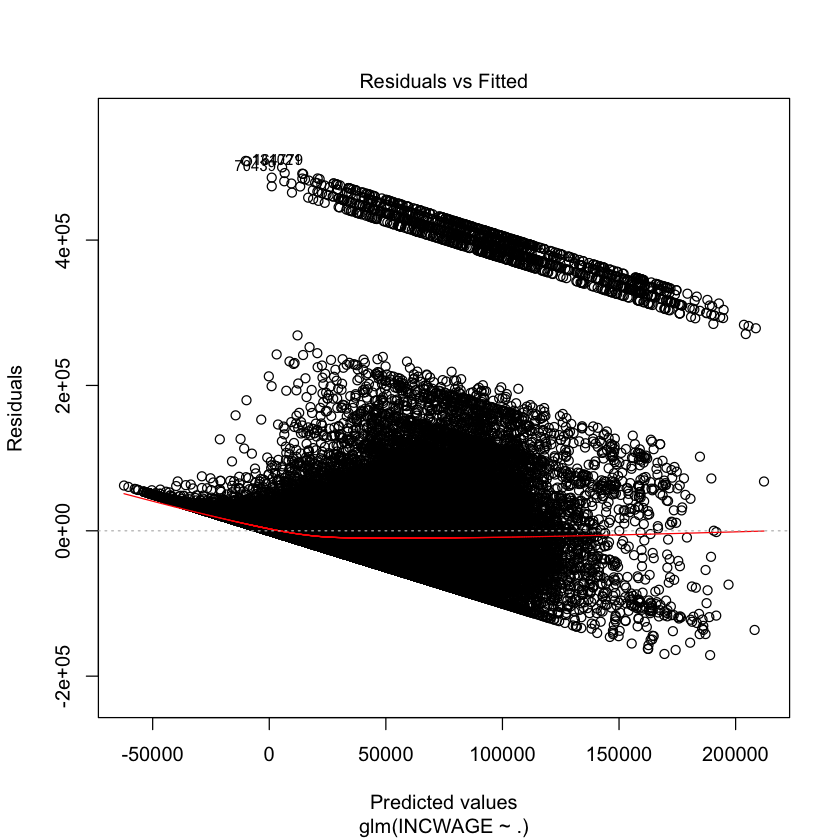

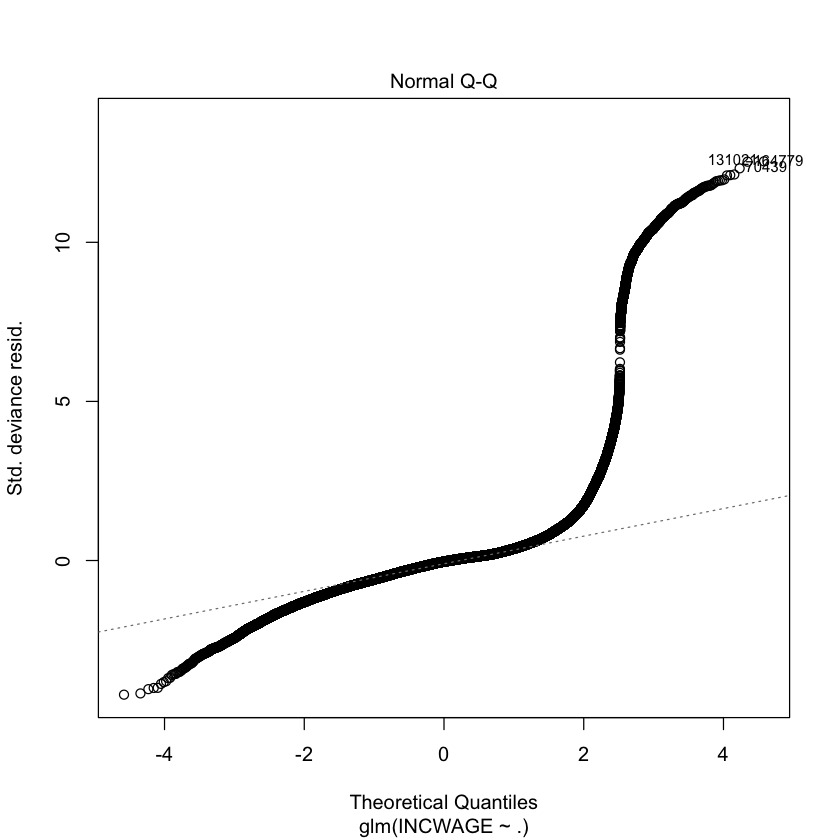

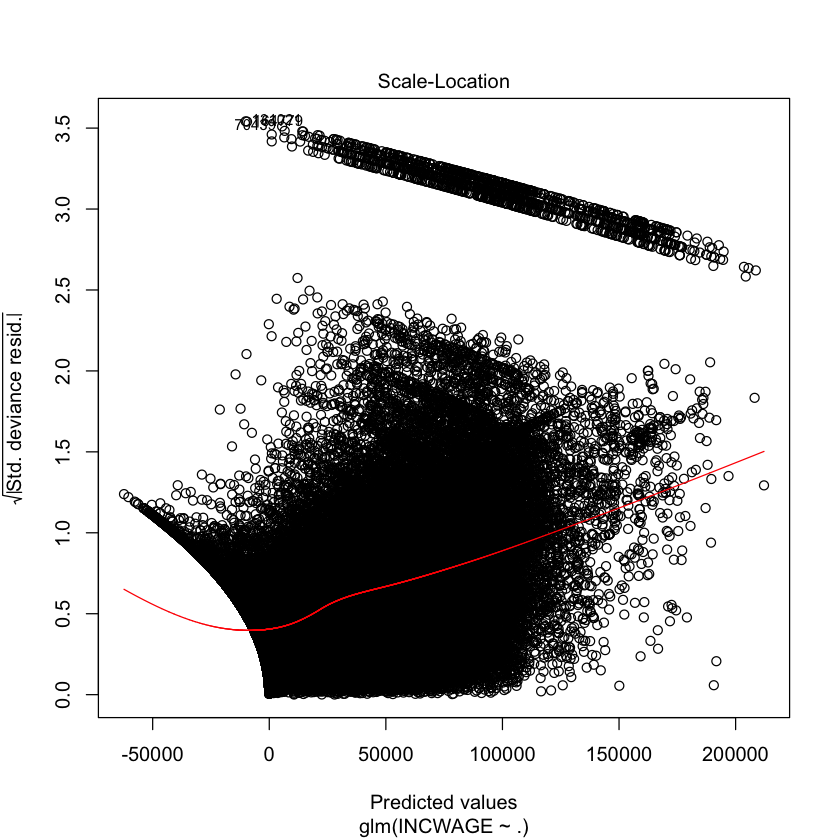

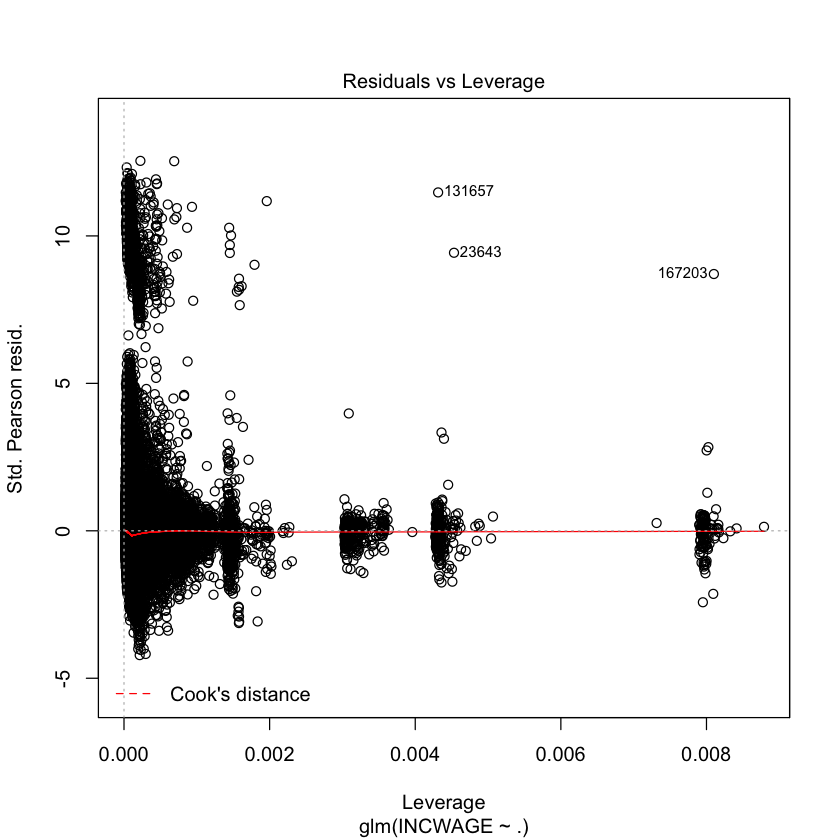

In [41]:
plot(lm_mn)